#### Install Python packages

Run the following package installations. **pip** is the package installer for Python. You can use pip to install packages from the Python Package Index and other indexes.

In [ ]:
!pip install hdbcli --break-system-packages
!pip install generative-ai-hub-sdk[all] --break-system-packages
!pip install folium --break-system-packages
!pip install git+https://tinyurl.com/ynnj4psz --break-system-packages
!pip install ipywidgets --break-system-packages

#### Restart Python kernel

The Python kernel needs to be restarted before continuing. 

> ![title](./images/config_001.png)

</br>

> **Note** This will take a couple of minutes.

In [1]:
import json
import requests

In [2]:
def get_token(clientid, clientsecret, authurl):
    resp = requests.post(	authurl+'/oauth/token?grant_type=client_credentials',		data={}, auth=(clientid, clientsecret))
    d = json.loads(resp.text)
    return "Bearer "+d["access_token"]

Please fill in your gen AI Hub/AI Core Key details below.

In [3]:
resource_group = ""
authurl = ""
clientid = ""
clientsecret =""
api_url = ""

deployment_id_gpt4 =""
deployment_id_embedding = ""

In [22]:
# test whether the connectivity works, by requesting a token
#get_token(clientid, clientsecret, authurl)

In [5]:
def askGPT(messages): # role assistant, user, system
    payload = {
        "messages": [
            {
                "role": "system",
                "content": messages[0]
            },
            {
                "role": "user",
                "content": messages[1]
            }
        ]
    }
    deployment_url = api_url+f"/v2/inference/deployments/"+deployment_id_gpt4
    endpoint = f"{deployment_url}/chat/completions?api-version=2023-05-15"

    headers = {"Authorization": get_token(clientid, clientsecret, authurl), 
           "ai-resource-group": resource_group,
           "Content-Type": "application/json"}

    return requests.post(endpoint, headers=headers, json=payload)

In [6]:
def embed(mystring):
    payload = {"input": mystring}
    deployment_url = api_url+f"/v2/inference/deployments/"+deployment_id_embedding
    endpoint = f"{deployment_url}/embeddings?api-version=2023-05-15"

    headers = {"Authorization": get_token(clientid, clientsecret, authurl), 
           "ai-resource-group": resource_group,
           "Content-Type": "application/json"}
    res = requests.post(endpoint, headers=headers, json=payload)
    return (res.json()['data'][0]['embedding'])

In [7]:
# pretty prints a json response
def print_res(my_response):
    print(json.dumps(my_response.json(), indent=4))

In [8]:
def print_gpt(my_response):
    print(my_response.json()["choices"][0]["message"]["content"])

In [10]:
# test gpt4
task  = "what is SAPs career starter program?"

res = askGPT(["",task])

print_res(res)

{
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "message": {
                "content": "SAP's Career Starter Program is designed to equip recent graduates or early career individuals with the skills, knowledge, and experience needed to start a successful career at SAP. The program provides training in various aspects of enterprise resource planning software, data management, and other relevant fields. It typically includes several months of classroom training followed by a hands-on project or rotation within different departments at SAP. The aim is to provide participants with a comprehensive understanding of SAP's business and a solid foundation for a long-term career at the company. The specifics of the program may vary depending on the region or country.",
                "role": "assistant"
            }
        }
    ],
    "created": 1718372599,
    "id": "chatcmpl-9a1V1EKxpcpdl51mYPYlaDfwgz8aR",
    "model": "gpt-4",
    "ob

In [11]:
# test the embedding. output vector is truncated to 50
task  = "what is SAPs career starter program?"
res = embed(task)
print("the first 50 entries of the vector are\n", res[0:50],"\nthe vector has a total length of ",len(res))

the first 50 entries of the vector are
 [0.01695748, -0.01888609, -0.0027196968, -0.030914899, -0.05771543, 0.033800673, -0.0119716665, -0.0026286237, -0.007485863, -0.018600369, 0.013793131, -0.006035834, -0.011443084, -0.0029072007, 0.0063144113, 0.0021643287, 0.019900395, -0.029543445, -0.003689359, -0.0006763527, 0.0021018274, 0.00022600895, 0.0043072286, -0.0022946885, 0.0088930335, 0.012921685, 0.02212901, -0.010721642, -0.029714877, -0.0042929426, -0.0058608307, -0.008128733, -0.011443084, -0.014378857, -0.011185937, -0.017700352, -0.007935872, -0.015200302, 0.006664418, -0.014450287, 0.02848628, 0.01888609, 0.0058465446, -0.0063572694, -0.002662553, 0.00064912, -0.016214607, -0.007464434, -0.010400207, 0.014014564] 
the vector has a total length of  1536


#### Visualiziation - Understanding the embedding

Similar words/texts have similar embedding vectors.
How similar two vectors are, is calculated using the so called "cosine similarity".<br>
Lets try to understand this:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
#import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

##### (Optional) small example: Understanding cosine similarity - our distance function

In [33]:
vector_example = [
[1,0], [0,1],[0.5,0.5]
]

norm = np.linalg.norm(vector_example[2])
vector_example[2] = [0.5 / norm, 0.5 / norm]
vectors = np.array(vector_example)

cs = cosine_similarity(vector_example,vector_example)
print(cs)

[[1.         0.         0.70710678]
 [0.         1.         0.70710678]
 [0.70710678 0.70710678 1.        ]]


plot vectors

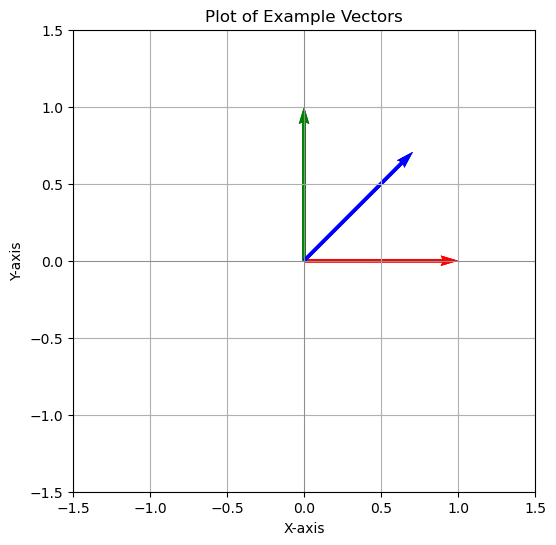

In [34]:
# Plot the vectors
plt.figure(figsize=(6, 6))
origin = np.zeros((2, len(vectors)))  # origin point

# Plot each vector
for vec, color in zip(vectors, ['r', 'g', 'b']):
    plt.quiver(*origin, vec[0], vec[1], color=color, scale=1, scale_units='xy', angles='xy')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid()
plt.title('Plot of Example Vectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [36]:
print("90 degree corresponds to pi/2 = ", np.pi/2)
print("45 degree corresponds to pi/4 = ", np.pi/4)
np.arccos(cs)

90 degree corresponds to pi/2 =  1.5707963267948966
45 degree corresponds to pi/4 =  0.7853981633974483


/tmp/ipykernel_127/3173748571.py:3: RuntimeWarning: invalid value encountered in arccos
  np.arccos(cs)


array([[0.        , 1.57079633, 0.78539816],
       [1.57079633, 0.        , 0.78539816],
       [0.78539816, 0.78539816,        nan]])

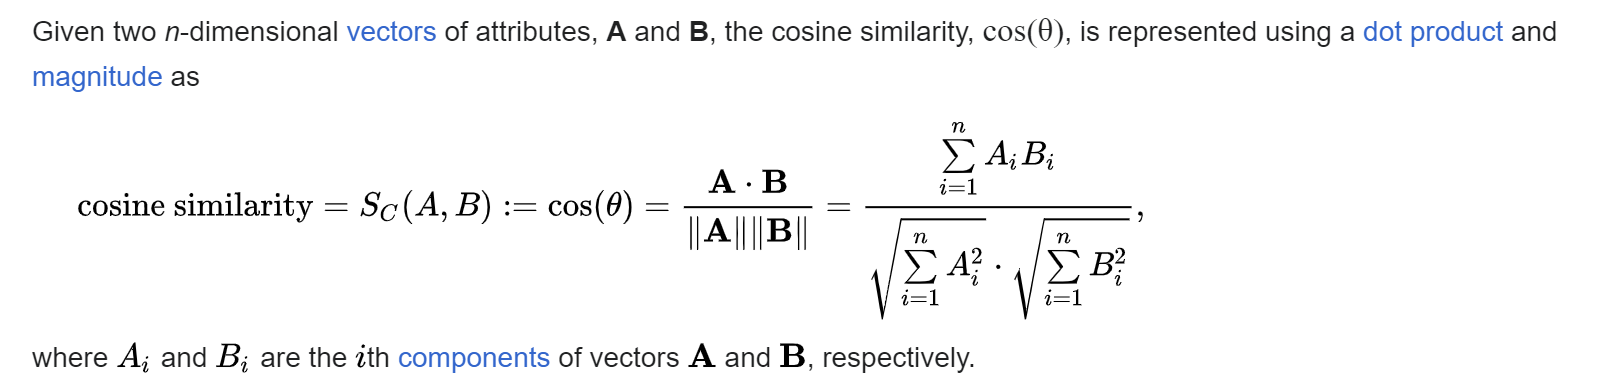

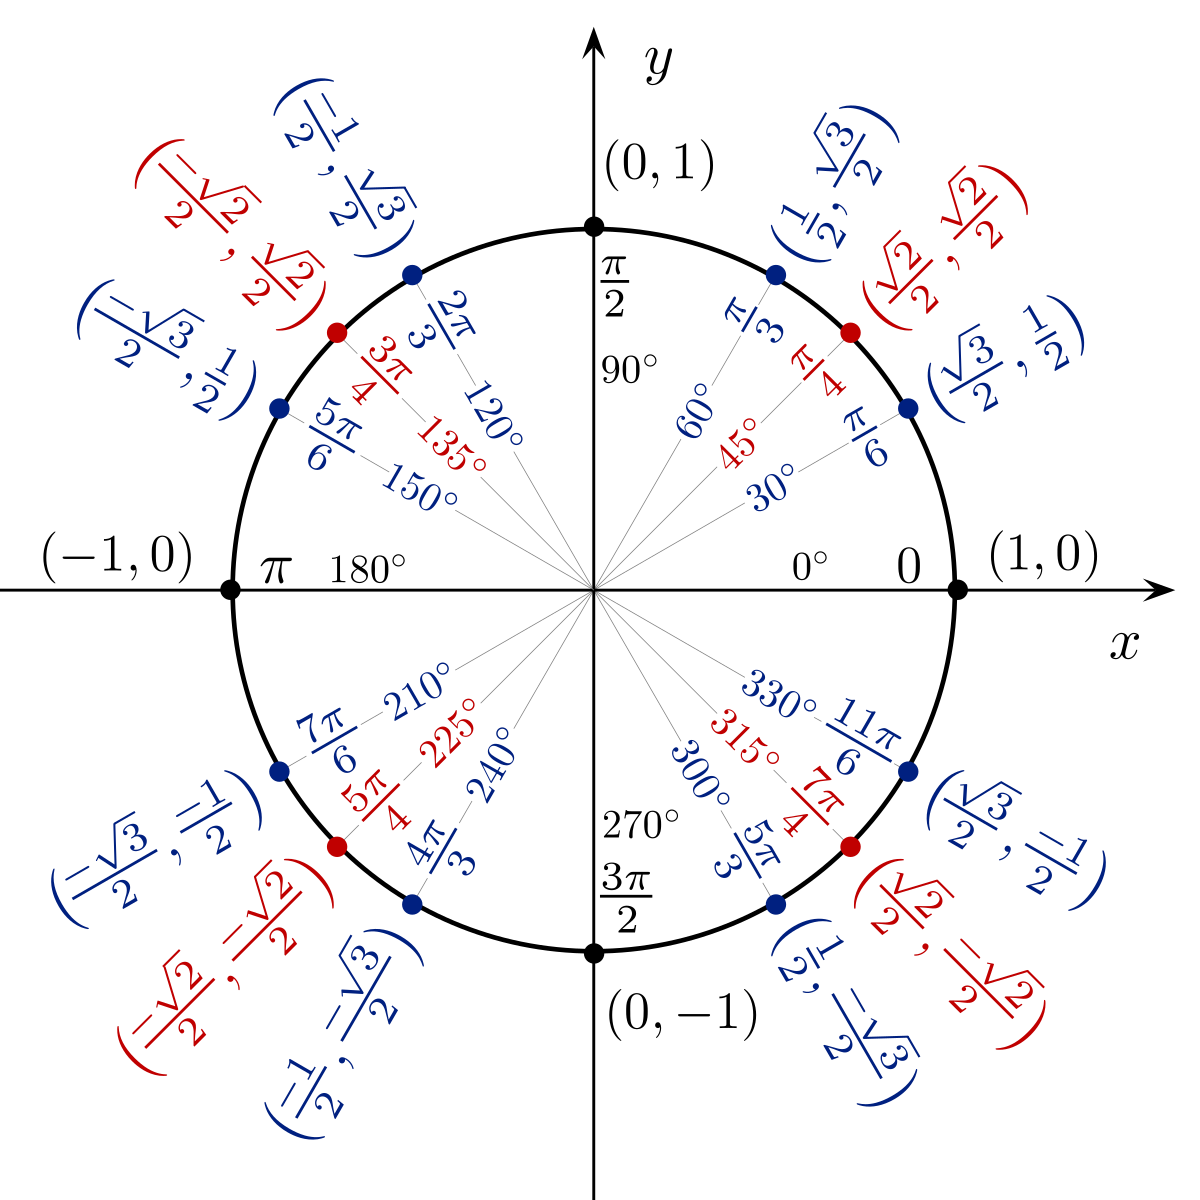

##### Define cosine similarity helper function

In [14]:
def cosineSim(df,texts):
    data= cosine_similarity(df, df)
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(texts)))
    ax.set_yticks(np.arange(len(texts)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(texts)
    ax.set_yticklabels(texts)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(texts)):
        for j in range(len(texts)):
            text = ax.text(j, i, str(data[i, j])[0:4],
                           ha="center", va="center", color="w")

    ax.set_title("Cosine Similarity")
    fig.tight_layout()
    plt.show()

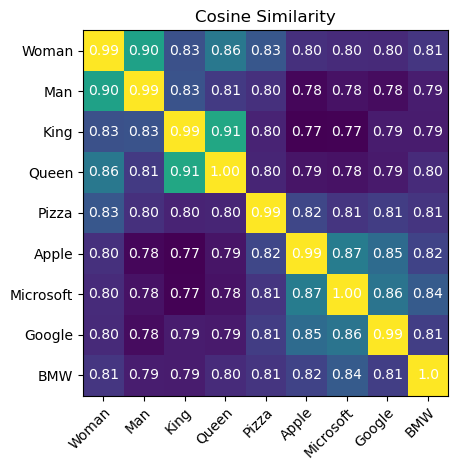

In [15]:
texts = ["Woman","Man","King","Queen", "Pizza","Apple","Microsoft","Google","BMW"]
vec_list = [ embed(a) for a in texts]
cosineSim(vec_list,texts)

### Knowledge database

Automatically consider every file in the code-subfolder.

In [16]:
from os import listdir
from os.path import isfile, join
from pathlib import Path
mypath = "texts"

In [17]:
mydict = {}
for f in listdir(mypath):
    mydict[Path(f).stem] = {"file":mypath+"/"+f }

In [18]:
mydict

{'zdf_weltwasserbericht': {'file': 'texts/zdf_weltwasserbericht.txt'},
 'forbes_sapphire': {'file': 'texts/forbes_sapphire.txt'},
 'tagesschau_bafoeg': {'file': 'texts/tagesschau_bafoeg.txt'},
 'tagesschau_wassermangel': {'file': 'texts/tagesschau_wassermangel.txt'}}

In [19]:
for a in mydict:
    with open(mydict[a]["file"], encoding="utf8") as f:
        data = f.read()
        mydict[a]["content"]= data
        #data=data[0:8190]
        mydict[a]["vector"] = embed(data)

In [20]:
mydict.keys()

dict_keys(['zdf_weltwasserbericht', 'forbes_sapphire', 'tagesschau_bafoeg', 'tagesschau_wassermangel'])

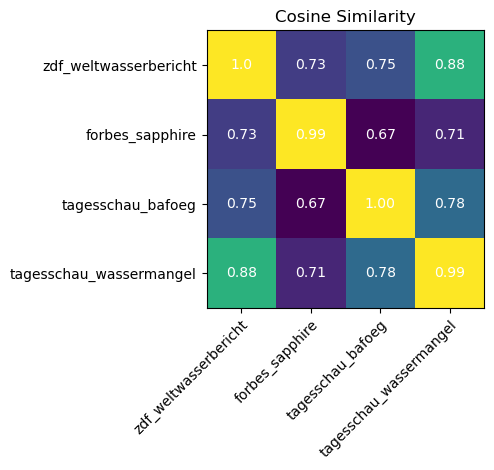

In [21]:
cosineSim(  [ mydict[a]["vector"]  for a in mydict], [ a for a in mydict])

### Find similar sources

In [73]:
def similiar_sources(dictionary, mytext, top_n):
        df =  [ dictionary[a]["vector"] for a in dictionary]
        df = df + [embed(mytext)]
        similarity_matrix= cosine_similarity(df, df)
        # Get the last vector's similarities with all other vectors
        last_vector_similarities = similarity_matrix[-1]
        
        # Exclude the similarity with itself by setting it to -1
        last_vector_similarities[-1] = -np.inf
    
        # Find the index of the most similar vector
        most_similar_index = np.argmax(last_vector_similarities)
        top_n_indices = np.argsort(last_vector_similarities)[-top_n:][::-1]
        return  [list(mydict.keys())[i] for i in top_n_indices]
        # Get the corresponding file name
        # return list(mydict.keys())[most_similar_index]

In [74]:
sim_sources = similiar_sources(mydict, "gibt es neue artikel zur wasserknappheit?", 2)
print(sim_sources)

['zdf_weltwasserbericht', 'tagesschau_wassermangel']


In [194]:
# show the content for the idenfitied sources
[mydict[a]["content"] for a in sim_sources]

['https://www.zdf.de/nachrichten/wissen/klima-wasser-bericht-un-100.html\nWeltwasserbericht 2024\n:\nWarum Wasserknappheit Frieden bedrohen kann\nKatharina Schuster\nvon Katharina Schuster\n22.03.2024 | 02:02\n\n|\n\n"Mit dem zunehmenden Wasserstress steigt auch das Risiko eines lokalen oder regionalen Konflikts", sagt die Unesco-Generaldirektorin. Der UN-Weltwasserbericht 2024 im Überblick:\n\n\nWassernot kann gravierende Folgen haben, warnt die UNO anlässlich des Weltwassertags. Beispiel Südafrika: Dort sind die Menschen teilweise auf Lieferungen per Tankwagen angewiesen.\n22.03.2024 | 1:08 min\n"Wenn Wasser ein Menschenrecht ist, warum lebt dann jeder vierte Mensch ohne sauberes Trinkwasser?", fragt die Unesco, die Organisation der Vereinten Nationen für Bildung, Wissenschaft und Kultur in ihrem neuen Weltwasserbericht.\nNach Ansicht der UN-Kulturorganisation kann die zunehmende Wasserknappheit auf der ganzen Welt Konflikte anfachen.\nWenn wir den Frieden bewahren wollen, müssen wir

### Build Prompt

In [75]:
similiar_sources(mydict, "gibt es neue artikel zur wasserknappheit?", 2)

['zdf_weltwasserbericht', 'tagesschau_wassermangel']

In [76]:
def build_prompt(question, sim_sources):
    nl = "\n"
    divider = "-" * 80
    prompt = ""
    prompt += nl + divider + nl
    prompt += "Question: "
    prompt += question
    prompt += nl + divider + nl
    prompt += "Sources:"""
    for doc in sim_sources:
        prompt += nl + divider + nl
        prompt += mydict[doc]["content"]
        
    prompt += nl + divider + nl
    return prompt
    

In [77]:
question = "are there updates on water shortages? "
sim_sources = similiar_sources(mydict, question,2)
# show what the prompt looks like
build_prompt(question, sim_sources)

'\n--------------------------------------------------------------------------------\nQuestion: are there updates on water shortages? \n--------------------------------------------------------------------------------\nSources:\n--------------------------------------------------------------------------------\nhttps://www.zdf.de/nachrichten/wissen/klima-wasser-bericht-un-100.html\nWeltwasserbericht 2024\n:\nWarum Wasserknappheit Frieden bedrohen kann\nKatharina Schuster\nvon Katharina Schuster\n22.03.2024 | 02:02\n\n|\n\n"Mit dem zunehmenden Wasserstress steigt auch das Risiko eines lokalen oder regionalen Konflikts", sagt die Unesco-Generaldirektorin. Der UN-Weltwasserbericht 2024 im Überblick:\n\n\nWassernot kann gravierende Folgen haben, warnt die UNO anlässlich des Weltwassertags. Beispiel Südafrika: Dort sind die Menschen teilweise auf Lieferungen per Tankwagen angewiesen.\n22.03.2024 | 1:08 min\n"Wenn Wasser ein Menschenrecht ist, warum lebt dann jeder vierte Mensch ohne sauberes Tr

### Ask GPT

In [78]:
instructions = "Please only use the provided sources to answer the questions. If possible also specify the regions mentioned in the sources."

#### Example 1

In [80]:
question = "are there updates on water shortages? "
sim_sources = similiar_sources(mydict, question,2)
prompt = build_prompt(question, sim_sources)

In [81]:
res = askGPT([instructions,prompt])
print_res(res)

{
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "message": {
                "content": "The UN World Water Report 2024 warns of an increasing water scarcity that can potentially fuel conflicts and disrupt peace. This situation is a grave threat, as seen in South Africa, where truck deliveries of water have become necessary. Every fourth person globally does not have access to clean drinking water, suggesting a crisis situation. Regional examples of conflict over water include disputes over water access initiatives in the Sahel region of Africa. Disputes can arise when demand exceeds supply, availability is affected by pollution, access to allocated water is restricted, or water and sewerage supplies are disrupted.\n\nIn Berlin, Germany, a concern is rising over the city's dependency on the Spree river for water supply as the river may lose up to 75% of its current water supply due to the phasing out of brown coal mining. This poten

#### Example 2

In [82]:
question = "Create a list of the most important topics in Sapphire."
sim_sources = similiar_sources(mydict, question,2)
prompt = build_prompt(question, sim_sources)

res = askGPT([instructions,prompt])
print_gpt(res)


1. AI-Powered Future: The AI-Powered Future was one of the key topics at SAP Sapphire 2024, with the company outlining their moves in artificial intelligence and cloud computing.

2. The New Phase of AI: SAP highlighted its approach of integrating AI into business processes and workflows to enhance productivity and efficiency.

3. Introduction of Joule: Joule, SAP's generative AI copilot, was introduced as a tool to improve user productivity across SAP's suite of solutions.

4. Integration with Microsoft 365 Copilot: SAP announced a deep integration between Joule and Microsoft 365 Copilot, aimed at enhancing user experience, productivity and collaboration.

5. GenAI Hub: The GenAI Hub was showcased as a place for customers and partners to develop bespoke AI use cases using various large language models.

6. RISE with SAP: RISE with SAP, the company's business transformation offering, was discussed as a significant driver of digital transformation.

7. Strong Partnerships: SAP's partner